#### Exploratory Data Analysis for Heart Disease Prediction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('data\cleaned_stroke.csv')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
df.shape

(5110, 11)

In [41]:
df.nunique()

gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [42]:
#searching for duplicates in the dataset
print(f'Duplicates in data set: {df.duplicated().sum()}, ({np.round(100*df.duplicated().sum()/len(df),1)}%)')

Duplicates in data set: 0, (0.0%)


### Summary of the dataset.

In [43]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### STATISTICAL INFERENCES 
- Median age of population is 43 years.
- 25% of the population is aged below 25
- Another 25% is aged above 60 and remaining in between these ages.
- Average glucose levels of the population is 106
- About 9.7% and 5.4% of population suffers from hypertension and heart disease respectively.
- People with higher BMI (BMI > 45) are less represented. This can affect our machine learning models significantly.

In [6]:
#creating a copy of dataset for the visualization
eda_df= df.copy()
#change values 1, 0 to have the issue or not
eda_df['hypertension'] = np.where(eda_df['hypertension'] == 1, 'Hypertension', 'No hypertension')
eda_df['heart_disease'] = np.where(eda_df['heart_disease'] == 1, 'Heart disease', 'No heart disease')
eda_df['stroke'] = np.where(eda_df['stroke'] == 1, 'Stroke', 'No stroke')
eda_df['ever_married'] = np.where(eda_df['ever_married'] == 'Yes', 'Ever married', 'Never')

#explore first five rows in the dataset
eda_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No hypertension,Heart disease,Ever married,Private,Urban,228.69,36.6,formerly smoked,Stroke
1,51676,Female,61.0,No hypertension,No heart disease,Ever married,Self-employed,Rural,202.21,NaN,never smoked,Stroke
2,31112,Male,80.0,No hypertension,Heart disease,Ever married,Private,Rural,105.92,32.5,never smoked,Stroke
3,60182,Female,49.0,No hypertension,No heart disease,Ever married,Private,Urban,171.23,34.4,smokes,Stroke
4,1665,Female,79.0,Hypertension,No heart disease,Ever married,Self-employed,Rural,174.12,24.0,never smoked,Stroke


In [7]:
print('Percentage of population which has 35 < BMI < 45 : {:0.2f}%'.format(df[(df['bmi'] < 45) & (df['bmi'] > 35)].shape[0]*100/df.shape[0]))
print('Percentage of population which has 45 < BMI < 60 : {:0.2f}%'.format(df[(df['bmi'] < 60) & (df['bmi'] > 45)].shape[0]*100/df.shape[0]))

Percentage of population which has 35 < BMI < 45 : 14.64%
Percentage of population which has 45 < BMI < 60 : 2.78%


## UNIVARIATE ANALYSIS
The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### CATEGORICAL FEAURES

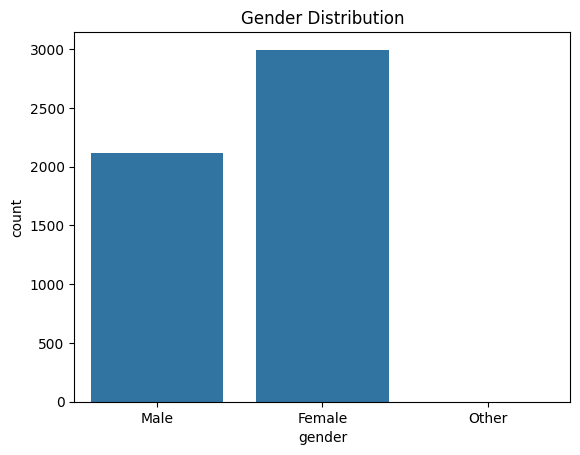

gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64

In [15]:
sns.countplot(x=eda_df['gender'])
plt.title("Gender Distribution")
plt.show()
eda_df['gender'].value_counts(normalize=True)

#### GENDER INFERENCE
- Greater amount of female patients than male patients in the dataset.
- Almost no patients in the gender category of "other", So we can drop it.

### Age Column Distribution

In [19]:
dt2=pd.DataFrame.copy(df)
bins=[0,10,20,30,40,50,60,70,80,90]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
dt2['age_group']=pd.cut(df['age'],bins=bins,labels=labels)


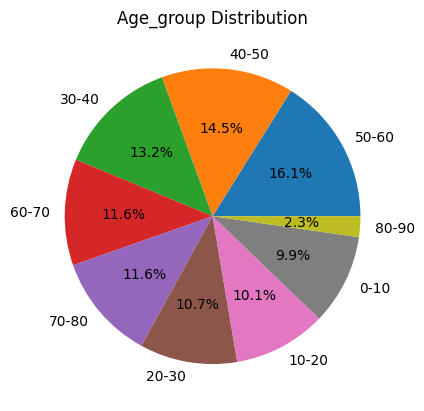

In [20]:

labels=dt2['age_group'].value_counts().index.tolist()
data=dt2['age_group'].value_counts().values.tolist()
plt.title("Age_group Distribution")

plt.pie(data,labels=labels, autopct='%1.1f%%')
plt.show()

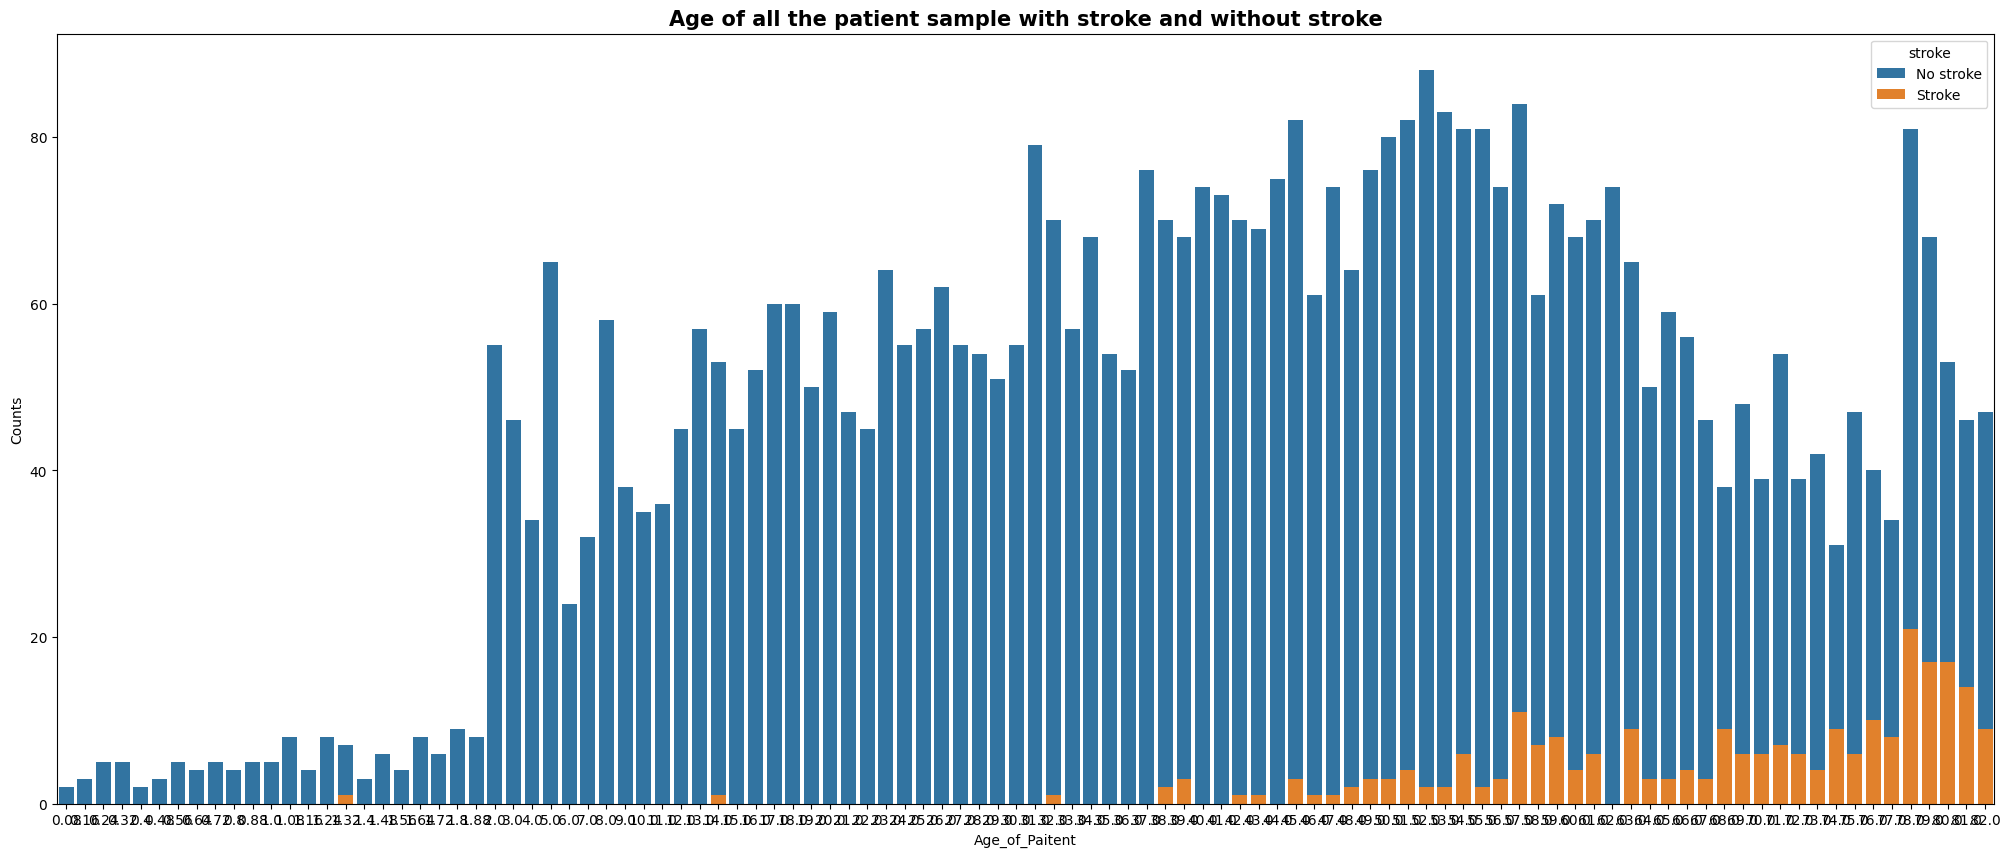

In [21]:
plt.figure(figsize=[25,10])
sns.countplot(data=eda_df.sort_values('age'),x='age',hue='stroke',dodge=False);
plt.title('Age of all the patient sample with stroke and without stroke' , fontsize = 15, fontweight ='bold');
plt.xlabel('Age_of_Paitent')
plt.ylabel('Counts')
plt.show()

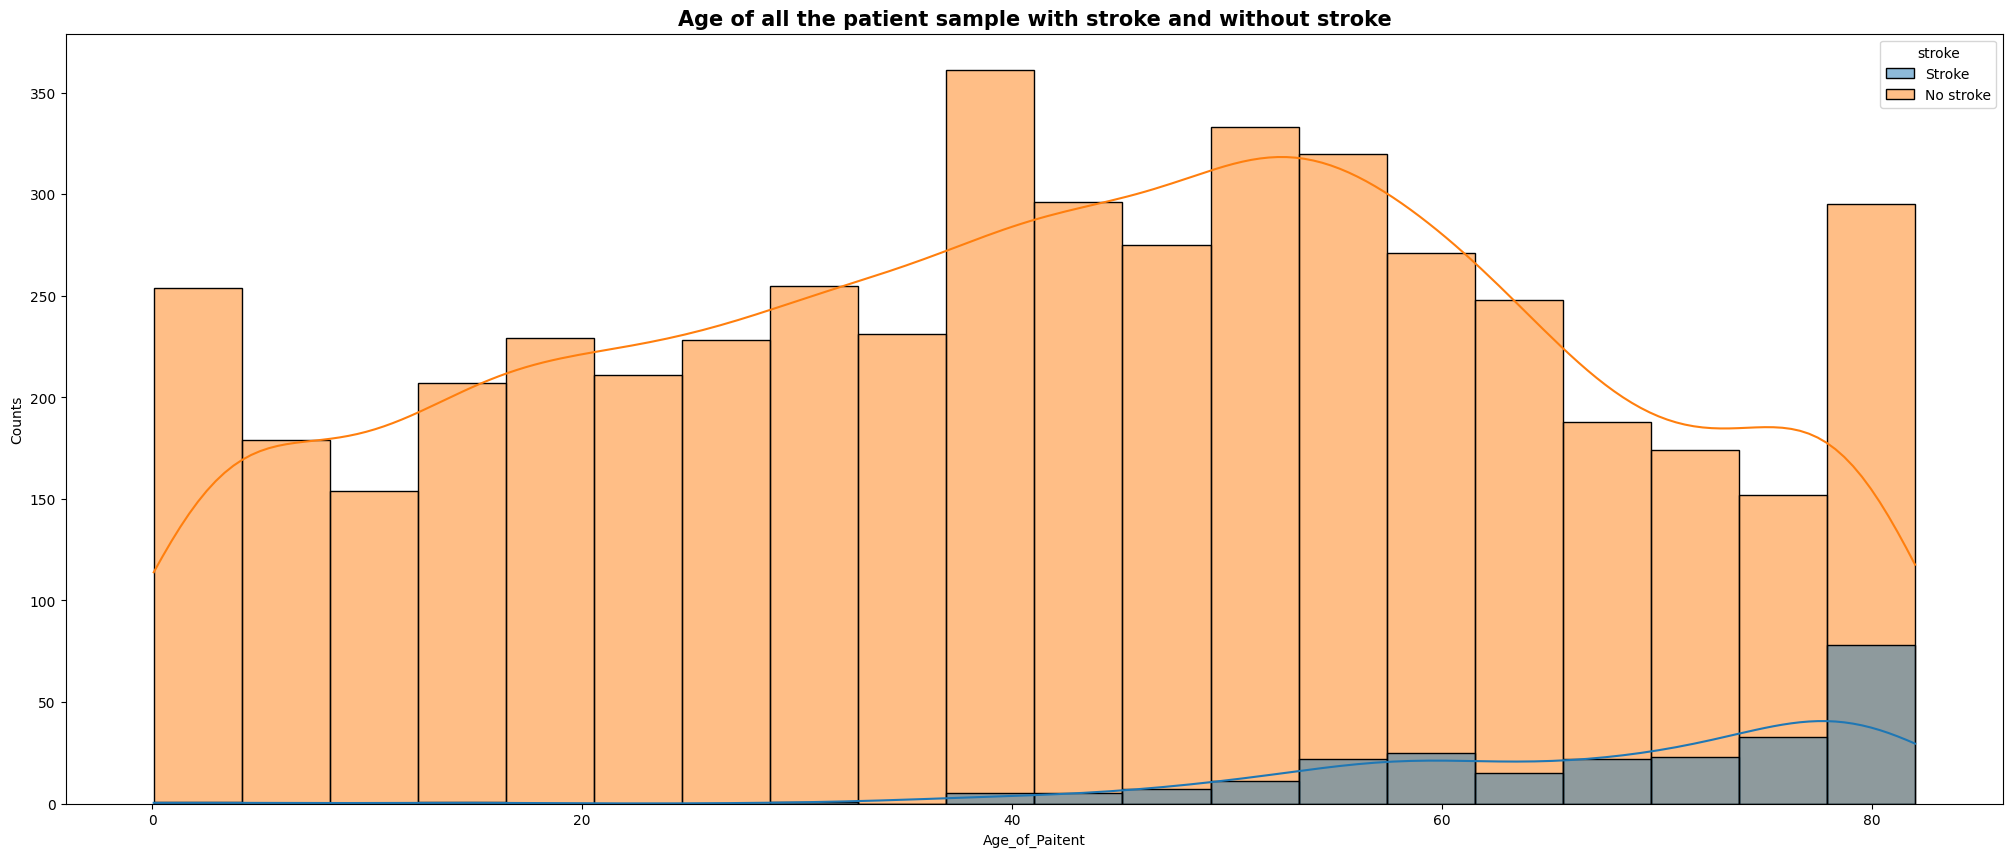

In [27]:
plt.figure(figsize=[25,10])
sns.histplot(data=eda_df,x='age',hue='stroke',kde=True);

plt.title('Age of all the patient sample with stroke and without stroke' , fontsize = 15, fontweight ='bold');
plt.xlabel('Age_of_Paitent')
plt.ylabel('Counts')
plt.show()

#### AGE INFERENCE
- The age distribution  shows that the age data is slightly skewed left
- Greater number of patients from older age groups.

### BMI parameter

BMI parameter can be divided into four categories.

The Categories of BMI :

- Under_weight ( BMI < 18.5 )
- Normal_weight ( 18.5 < BMI < 25 )
- Over_weight ( 25 < BMI < 30 )
- Obese ( BMI > 30 )

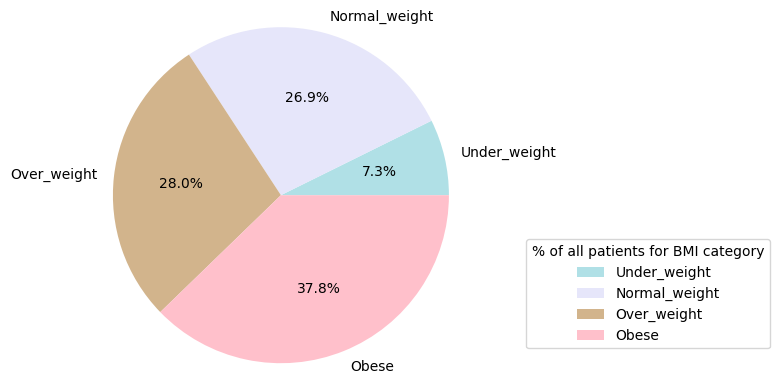

In [28]:
fig1, ax1 = plt.subplots()
ax1.pie(x=[eda_df[eda_df['bmi'] <= 18.5]['stroke'].value_counts()[0] , 
   eda_df[(eda_df['bmi'] <= 25) & (eda_df['bmi'] > 18)]['stroke'].value_counts()[0] , 
   eda_df[(eda_df['bmi'] <= 30) & (eda_df['bmi'] > 25)]['stroke'].value_counts()[0] , 
   eda_df[eda_df['bmi'] > 30]['stroke'].value_counts()[0] ], 
    labels=['Under_weight','Normal_weight','Over_weight','Obese'] , 
    pctdistance=0.6 , radius=6  , autopct='%1.1f%%' , 
    colors=['powderblue','lavender','tan','pink'] )

ax1.axis('equal')
plt.legend(title = "% of all patients for BMI category" , loc=1 , bbox_to_anchor=(1.5, 0.4))
plt.show() 

<Figure size 2500x1200 with 0 Axes>

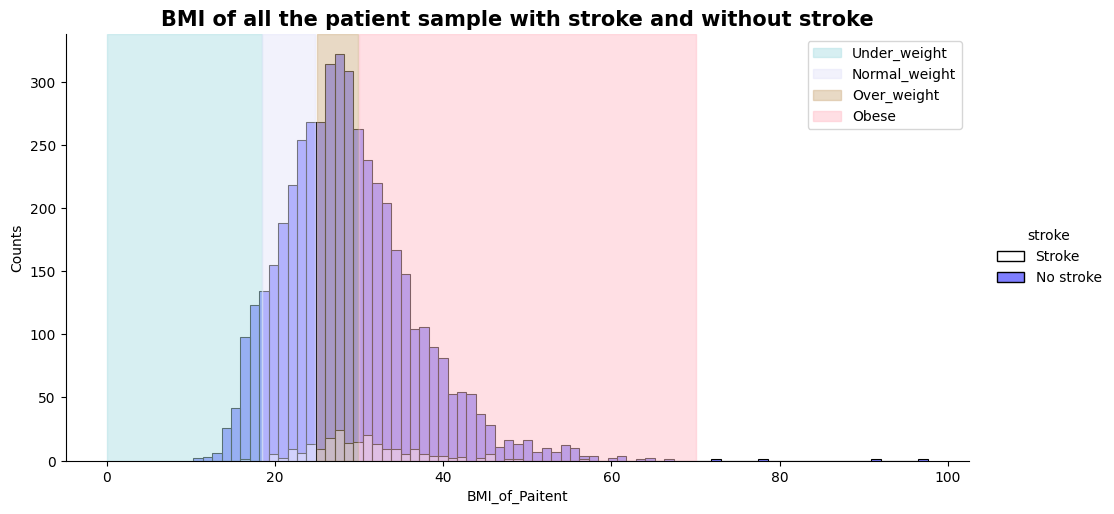

In [30]:
plt.figure(figsize=[25,12])
sns.displot(data=eda_df,x='bmi',hue='stroke' , aspect=2 , palette='flag' )
plt.title('BMI of all the patient sample with stroke and without stroke' , fontsize = 15, fontweight ='bold')
plt.axvspan(0, 18.4, color='powderblue', alpha=0.5)
plt.axvspan(18.5, 24.8, color='lavender', alpha=0.5)
plt.axvspan(25, 29.9, color='tan', alpha=0.5)
plt.axvspan(30, 70, color='pink', alpha=0.5)


plt.xlabel('BMI_of_Paitent')
plt.ylabel('Counts')
plt.legend(labels=['Under_weight','Normal_weight','Over_weight','Obese'])
plt.show()

#### BMI INFERENCE
- The stroke is dependes on the Body mass index 
- The most of the stroke patients are who have over weight and there BMI is more than 25.

### Hypertension Distribution

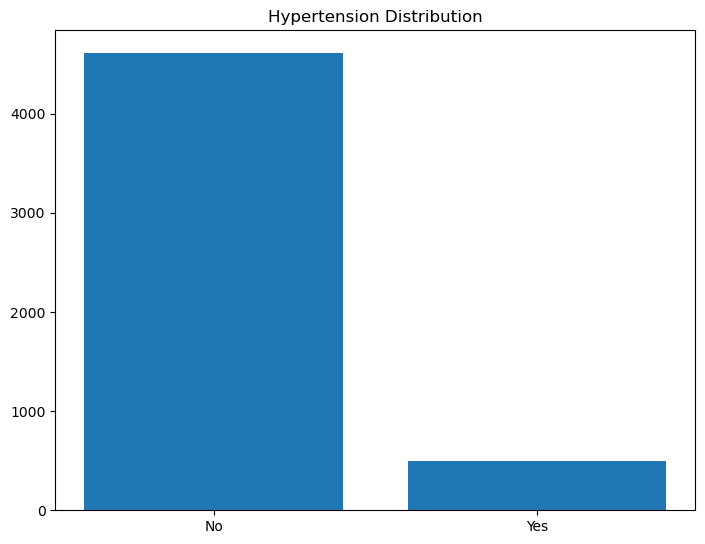

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["No", "Yes"]
x = df["hypertension"].value_counts()[0]
y = df["hypertension"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)


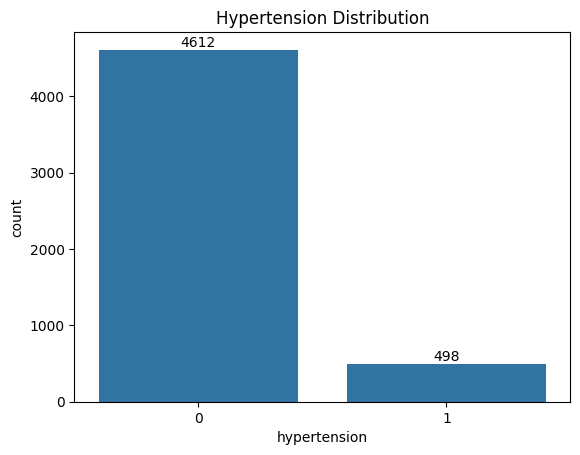

In [42]:
ax =sns.countplot(x="hypertension",data=df)
plt.title("Hypertension Distribution")
abs_values = df['hypertension'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()


#### HYPERTENSION INFERENCE
- we can see that the amount of patients with hypertension is significantly less than those with no hypertension.

#### Heart Disease Distribution

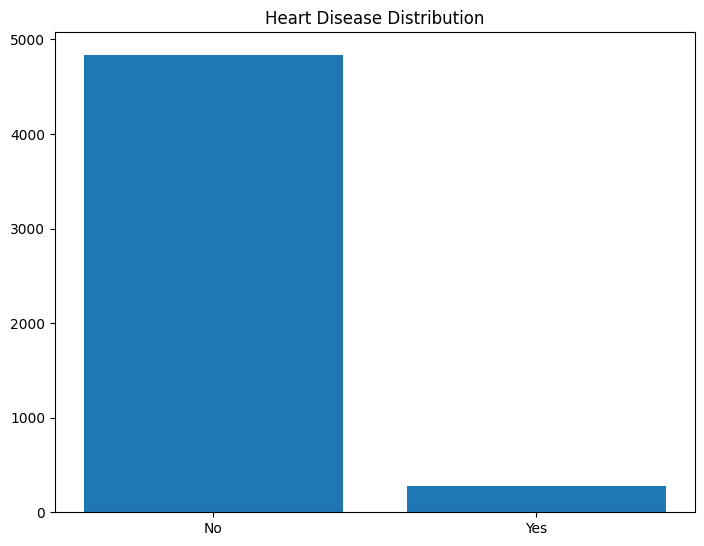

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["No", "Yes"]
x = df["heart_disease"].value_counts()[0]
y = df["heart_disease"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)
plt.title("Heart Disease Distribution")
plt.show()

#### HEART DISEASE INFERENCE
- More patients without heart disease than with heart disease in the dataset.

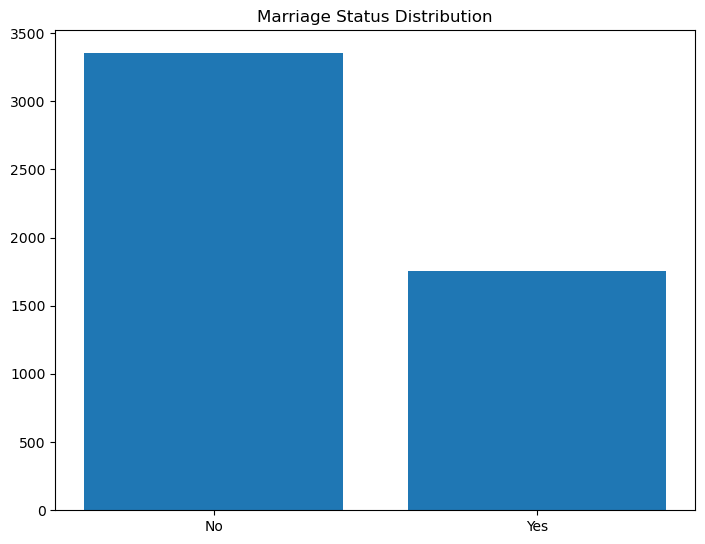

Amount of Patients who have been married:  1757
Amount of Patients who have been never married:  3353


In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df["ever_married"].value_counts()[0]
y = df["ever_married"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)
plt.title("Marriage Status Distribution")
plt.show()
print("Amount of Patients who have been married: ", y)
print("Amount of Patients who have been never married: ", x)

#### MARRIAGE STATUS INFERENCE
-  Amount of patients who have been married is slightly more than half of the amount of patients who have never been married.

Private:  2925
Self Employed:  819
Government Job:  657
Children:  687
Never Worked:  22


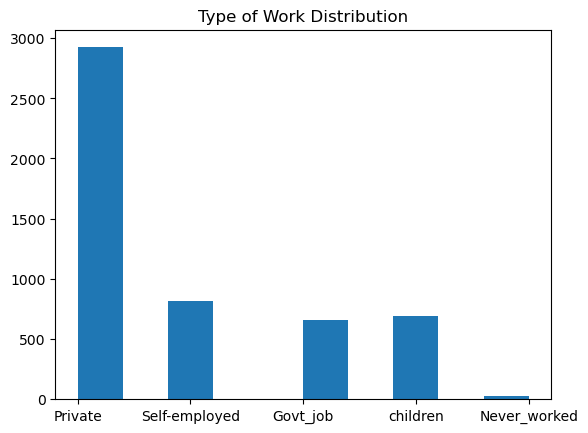

In [61]:
plt.hist(df["work_type"])
plt.title("Type of Work Distribution")

private = df["work_type"].value_counts()["Private"]
self_employed = df["work_type"].value_counts()["Self-employed"]
govt_job = df["work_type"].value_counts()["Govt_job"]
children = df["work_type"].value_counts()["children"]
never_worked = df["work_type"].value_counts()["Never_worked"]

print("Private: ", private)
print("Self Employed: ", self_employed)
print("Government Job: ", govt_job)
print("Children: ", children)
print("Never Worked: ", never_worked)

#### TYPE_OF_WORK INFERENCE

- The greatest amount of patients with a private work type.
- The least amount of patients with no work experience.

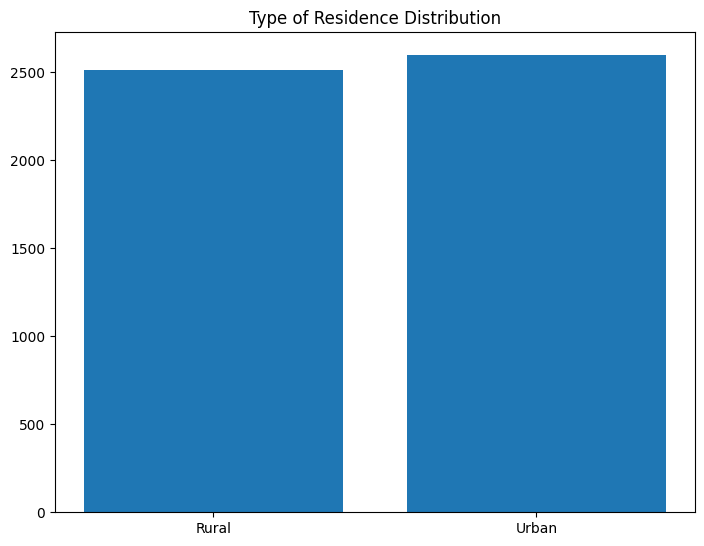

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["Rural", "Urban"]
x = df["Residence_type"].value_counts()["Rural"]
y = df["Residence_type"].value_counts()["Urban"]
counts = [x, y]
ax.bar(values, counts)
plt.title("Type of Residence Distribution")
plt.show()


#### TYPE OF RESIDENCE INFERENCE

- The Amount of patients that reside in rural areas seems to be roughly equal to the amount of patients that reside in urban areas.

Text(0.5, 1.0, 'Smoking Status Distribution')

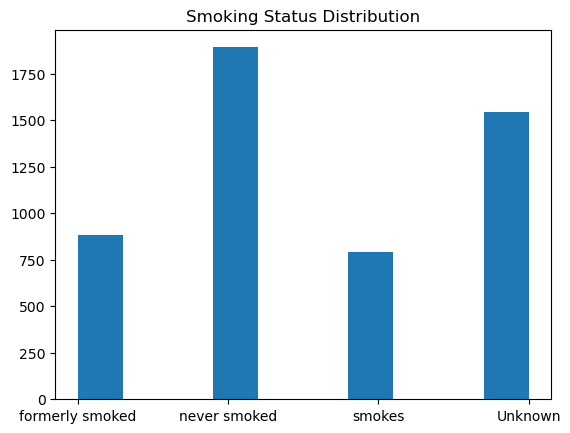

In [63]:
plt.hist(df["smoking_status"])
plt.title("Smoking Status Distribution")

#### SMOKING_STATUS INFERENCE

- Of the patients whose smoking status is known, the greatest amount are those who have never smoked.

### NUMERICAL COLUMNS

Median:  91.88499999999999
Mean:  106.1476771037182


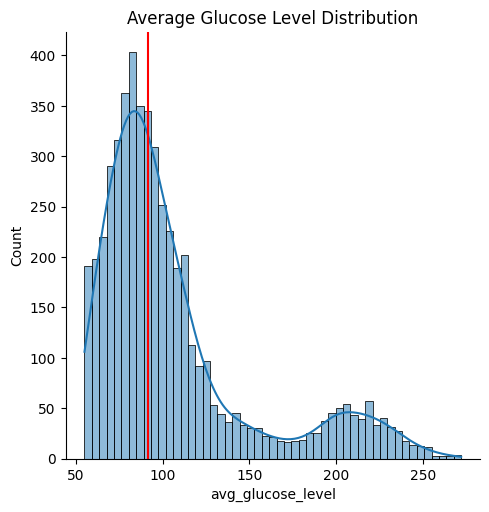

In [53]:
sns.displot(df['avg_glucose_level'],kde=True).set(title="Average Glucose Level Distribution")
plt.axvline(x=df.avg_glucose_level.median(), color='red')
print("Median: ", df.avg_glucose_level.median())

print("Mean: ", df.avg_glucose_level.mean())

#### GLUCOSE_LEVEL INFERENCE

- The average glucose level distribution is skewed right.
- With a major peak around roughly 80 and a smaller peak around 210.

### BMI Infrence

Median:  28.1


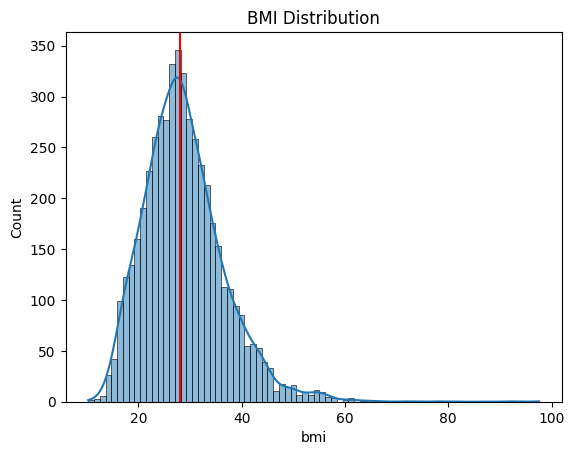

In [54]:
sns.histplot(df['bmi'],kde=True).set(title="BMI Distribution")
plt.axvline(x=df.bmi.median(), color='red')
print("Median: ", df.bmi.median())

#### BMI INFERENCE

- The bmi distribution is skewed right.
- Majority of patients have a bmi between 20 and 40.
- The median of the distribution is 28.4

## BIVARIATE ANALYSIS

[Text(0.5, 1.0, 'Stroke Distribution by Gender')]

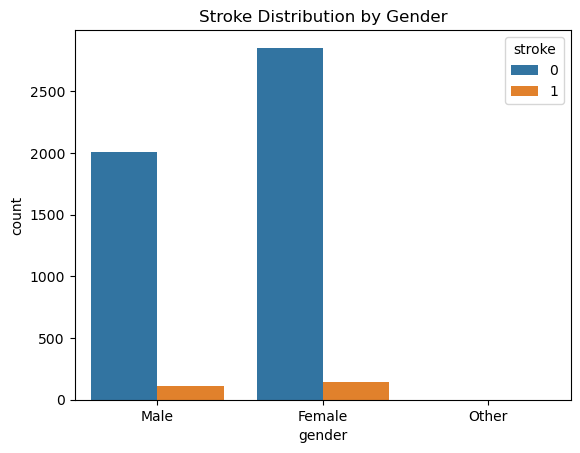

In [66]:
sns.countplot(data=df, x='gender', hue='stroke').set(title="Stroke Distribution by Gender")

#### INFERENCES

- Very small portion of both males and females in the dataset experienced stroke.
- It seems that the amount of those who experienced stroke in both genders is about the same.

[Text(0.5, 1.0, 'Stroke Distribution by Hypertension')]

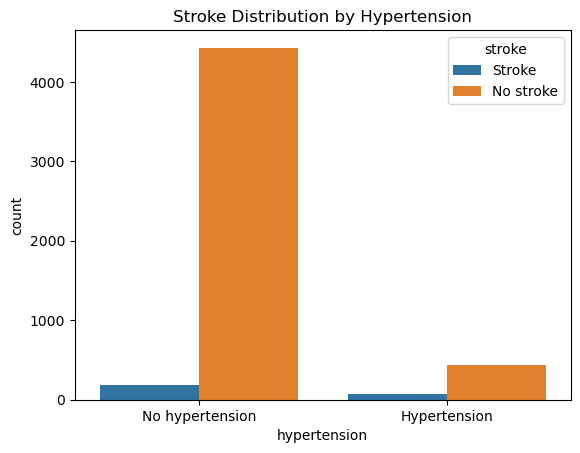

In [67]:
sns.countplot(data=eda_df, x='hypertension', hue='stroke').set(title="Stroke Distribution by Hypertension")

#### INFERENCES

- Patients that did not suffer from hypertension had a larger number of stroke cases than those that did have hypertension.


[Text(0.5, 1.0, 'Stroke Distribution by Heart Disease')]

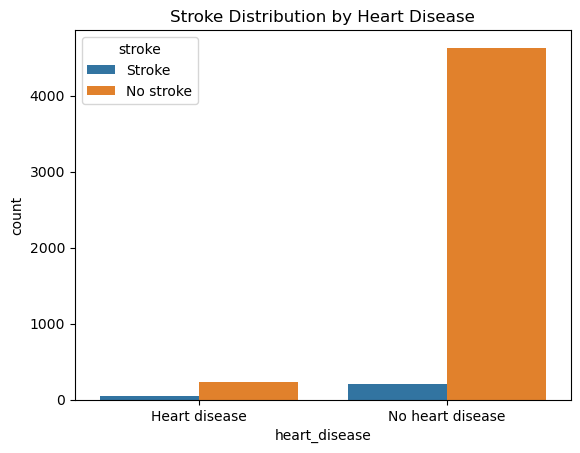

In [68]:
sns.countplot(data=eda_df, x='heart_disease', hue='stroke').set(title="Stroke Distribution by Heart Disease")

#### INFERENCES

-  There were sizably more patients that experienced a stroke and didn't have heart disease than those who had both.

[Text(0.5, 1.0, 'Stroke Distribution by Marriage Status')]

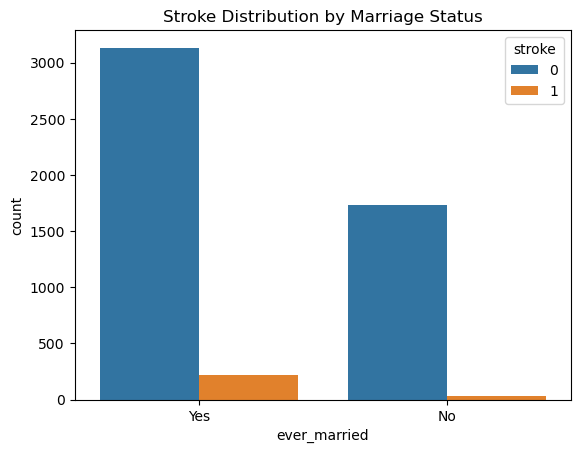

In [69]:
sns.countplot(data=df, x='ever_married', hue='stroke').set(title="Stroke Distribution by Marriage Status")

#### INFERENCES

-  Greater amount of patients that were married experienced stroke than those that were not married

[Text(0.5, 1.0, 'Stroke Distribution by Work Type')]

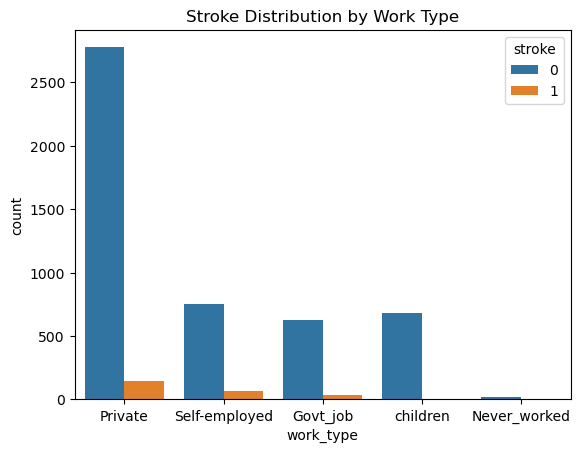

In [70]:
sns.countplot(data=df, x='work_type', hue='stroke').set(title="Stroke Distribution by Work Type")

#### INFERENCES

-  Most of the patients who experienced strokes worked in private jobs.4
-  Most people who had a stroke work at a private company

[Text(0.5, 1.0, 'Stroke Distribution by Residence Type')]

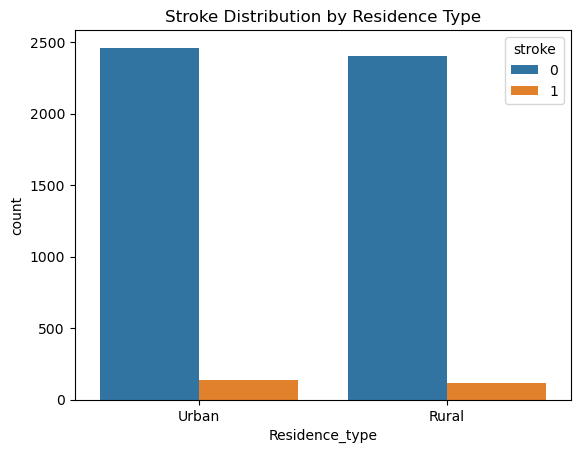

In [72]:
sns.countplot(data=df, x='Residence_type', hue='stroke').set(title="Stroke Distribution by Residence Type")

#### INFERENCES

-  Similar amount of patients from both urban and rural areas that experienced stroke.

[Text(0.5, 1.0, 'Stroke Distribution by Smoking Status')]

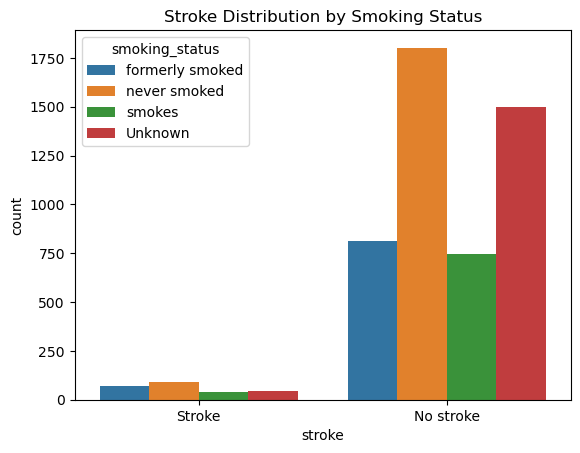

In [74]:
sns.countplot(data=eda_df, x='stroke', hue='smoking_status').set(title="Stroke Distribution by Smoking Status")

#### INFERENCES

-  Smoking status has little influence on the probability of having a stroke.

### MULTIVARIATE ANALYSIS

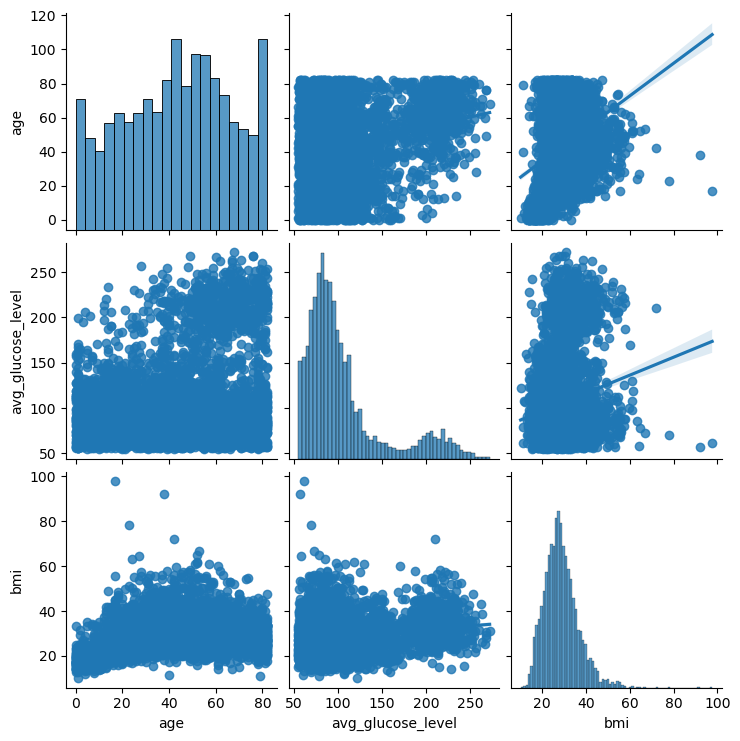

In [76]:
sns.pairplot(df, vars=["age", "avg_glucose_level","bmi"],kind="reg")

#### INFERENCES

-  The pairplot indicates that there is a positive association between bmi and age, and bmi and average glucose level.

##  CORRELATION ANALYSIS

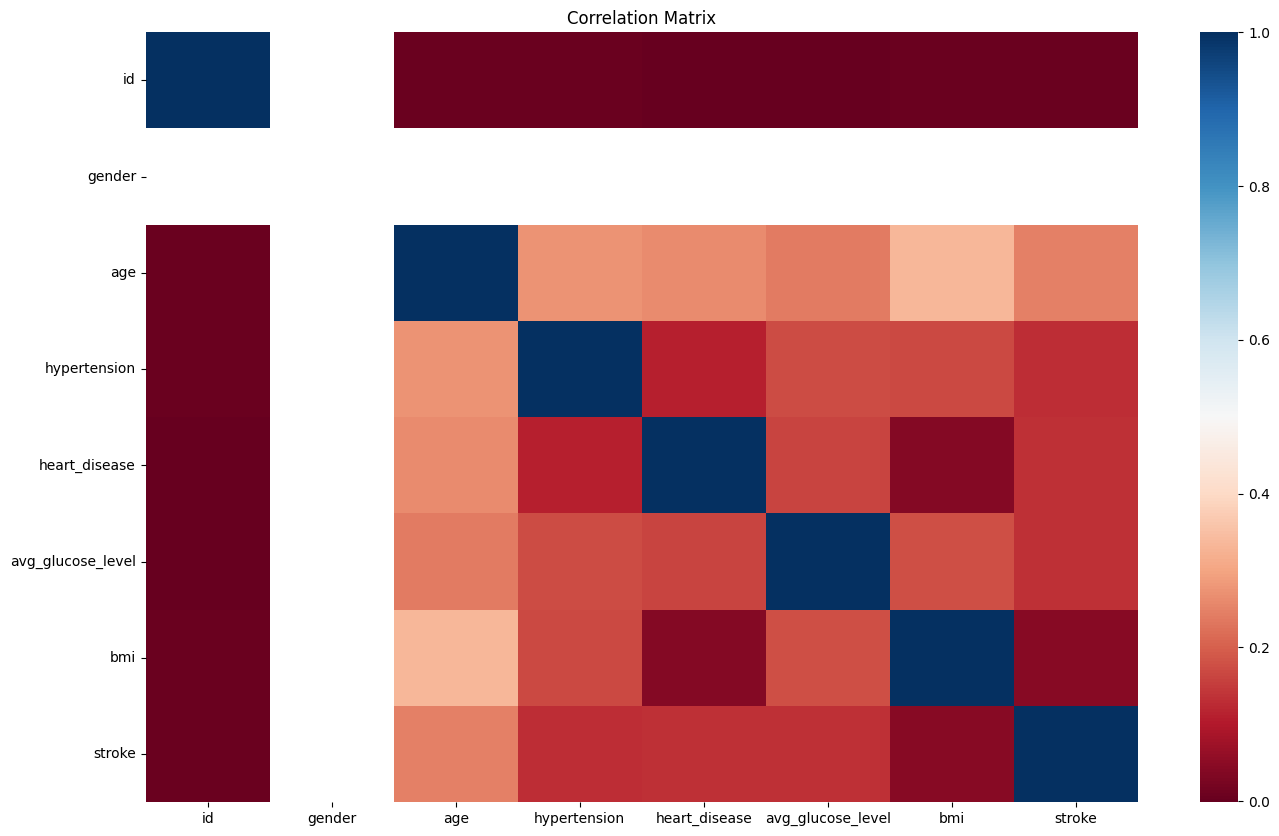

In [55]:
# get correlation matrix
df_base= df.copy()
df_base['gender'] = df_base['gender'].map({'male': 0,'female': 1})
plt.figure(figsize = (16,10), dpi=100)
sns.heatmap(df_base.corr(numeric_only=True), cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

#### INFERENCES
- Age shows the strongest correlation with dependent feature stroke.
- BMI is weakly correlated with dependent feature stroke stroke. 
- Age positivly correlates with 'hypertension', 'heart desease', 'avg_glucose_level'. So all of them tends to increase with an increase in age.

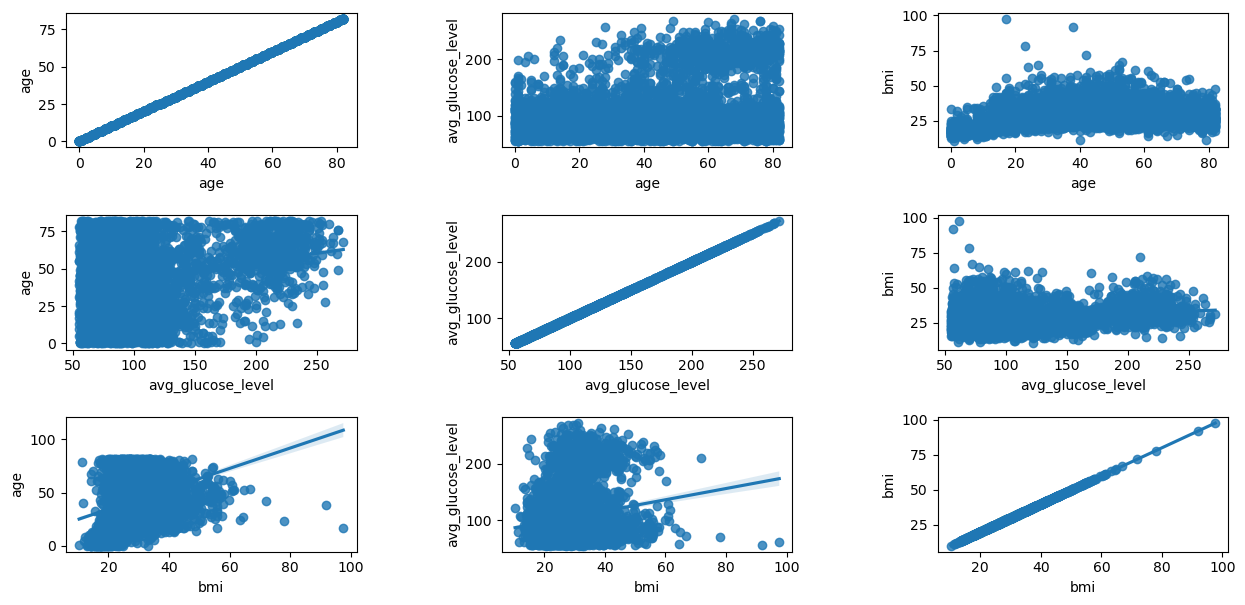

In [85]:
plt.figure(1, figsize=(15,7))
n = 0
for x in ['age','avg_glucose_level','bmi']:
    for y in ['age','avg_glucose_level','bmi']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)

plt.show()

#### INFERENCES

- As we can see that the higher body mass index you get the higher average glucose level
- We can also see that the the older you get the higher your body mass index will be

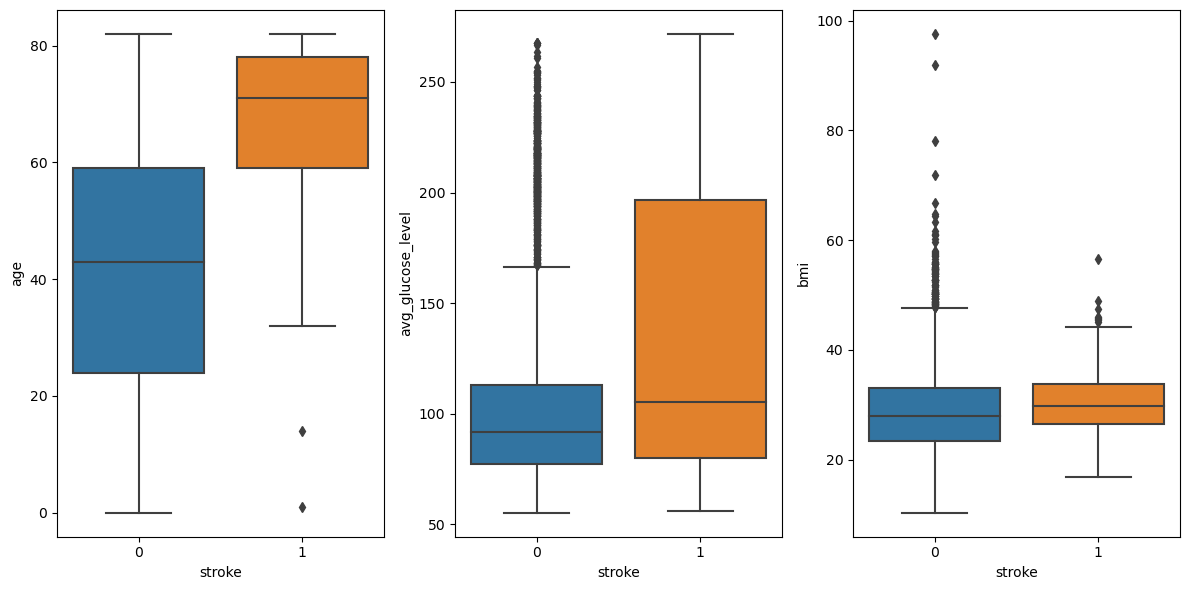

In [87]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.boxplot(data=df, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

#### INFERENCES
- Most patients who have had a stroke are over the age of 60.
- But, it's still possible that younger people can also experience it, as we can see there are some outliers
- We can assume that the age of the patient has a correlation whether the patient had a stroke or not